In [3]:
import pandas as pd

In [4]:
!uv pip install scikit-learn==1.6.1 xgboost==3.1.2 imbalanced-learn==0.14.0


Using Python 3.12.12 environment at: C:\Users\manas\OneDrive\Desktop\Autojudge\.venv
Audited 3 packages in 22ms


In [5]:
df = pd.read_json("../data/problems_data.jsonl.txt", lines=True, encoding="utf-8")

In [5]:
df

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree
...,...,...,...,...,...,...,...,...
4107,Tölvunarfræðingar telja,Computer scientists count a bit different from...,Input consists of one line with one integer $n$.,"Output the $n$-th\n number, according to co...","[{'input': '1', 'output': '0'}, {'input': '2',...",easy,1.1,https://open.kattis.com/problems/tolvunarfraed...
4108,Velkomin!,Welcome to Forritunarkeppni Framhaldsskólanna ...,There is no input in this problem.,Print a single line containing VELKOMIN!,"[{'input': '', 'output': 'VELKOMIN!'}]",easy,1.1,https://open.kattis.com/problems/velkomin
4109,Til hamingju,,There is no input in this problem.,Print a single line containing TIL\n HAMING...,"[{'input': '', 'output': 'TIL HAMINGJU MED AFM...",easy,1.1,https://open.kattis.com/problems/tilhamingju
4110,Hipp Hipp,,There is no input in this problem.,Print 20 lines. Each line should contain Hipp ...,"[{'input': '', 'output': 'Hipp hipp hurra! Hip...",easy,1.1,https://open.kattis.com/problems/hipphipp


In [25]:
# Run this only if libraries are not installed
!uv pip install pandas numpy scikit-learn imbalanced-learn xgboost joblib

Using Python 3.12.12 environment at: C:\Users\manas\OneDrive\Desktop\Autojudge\.venv
Resolved 13 packages in 785ms
 Downloaded xgboost
Prepared 3 packages in 11.73s
Installed 3 packages in 104ms
 + imbalanced-learn==0.14.1
 + sklearn-compat==0.1.5
 + xgboost==3.1.2


In [8]:
import pandas as pd
import numpy as np
import re
import json
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            f1_score, mean_absolute_error, mean_squared_error, r2_score)

# Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from xgboost import XGBClassifier, XGBRegressor

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# For saving models
import joblib

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [10]:
print(f" Dataset Shape: {df.shape}")
print(f"\n Columns: {df.columns.tolist()}")
print(f"\n Data Types:\n{df.dtypes}")
print(f"\n First 3 rows:")
df.head(3)

 Dataset Shape: (4112, 8)

 Columns: ['title', 'description', 'input_description', 'output_description', 'sample_io', 'problem_class', 'problem_score', 'url']

 Data Types:
title                  object
description            object
input_description      object
output_description     object
sample_io              object
problem_class          object
problem_score         float64
url                    object
dtype: object

 First 3 rows:


,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi


In [11]:
# Check missing values
print(" Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)

# Check for empty strings (not null but empty)
print("\n Empty Strings Count:")
for col in ['title', 'description', 'input_description', 'output_description']:
    empty_count = (df[col].astype(str).str.strip() == '').sum()
    print(f"  {col}: {empty_count}")

print("\n" + "="*50)

# Check sample_io type
print(f"\n sample_io type (first row): {type(df['sample_io'].iloc[0])}")
print(f" sample_io example:\n{df['sample_io'].iloc[0]}")

 Missing Values:
title                 0
description           0
input_description     0
output_description    0
sample_io             0
problem_class         0
problem_score         0
url                   0
dtype: int64


 Empty Strings Count:
  title: 0
  description: 81
  input_description: 120
  output_description: 131


 sample_io type (first row): <class 'list'>
 sample_io example:
[{'input': '7 10', 'output': '1 2\n2 3\n1 3\n3 4\n5 6\n6 7\n5 7\n1 7\n7 2\n5 1'}]


 Problem Class Distribution:
problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64


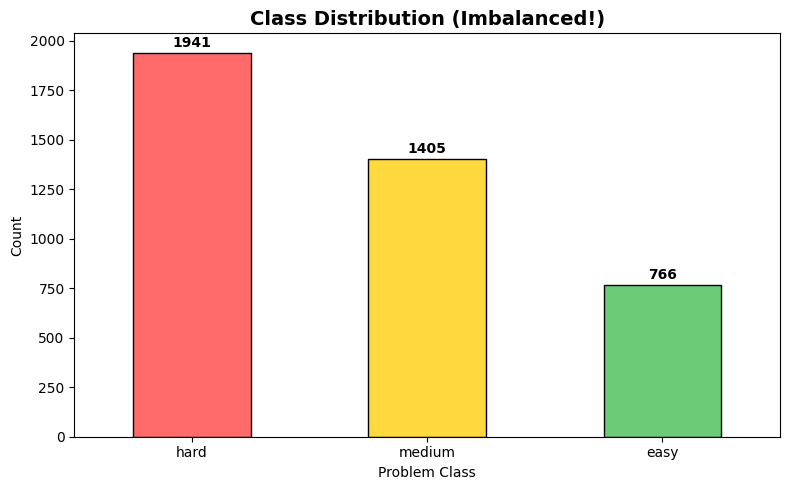


 Class Percentages:
problem_class
hard      47.20
medium    34.17
easy      18.63
Name: count, dtype: float64


In [12]:
# Class distribution
print(" Problem Class Distribution:")
class_counts = df['problem_class'].value_counts()
print(class_counts)

# Visualize
plt.figure(figsize=(8, 5))
colors = ['#ff6b6b', '#ffd93d', '#6bcb77']
class_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Class Distribution (Imbalanced!)', fontsize=14, fontweight='bold')
plt.xlabel('Problem Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add count labels on bars
for i, v in enumerate(class_counts):
    plt.text(i, v + 30, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Show percentages
print("\n Class Percentages:")
print((class_counts / len(df) * 100).round(2))

 Problem Score Statistics:
count    4112.000000
mean        5.114689
std         2.177770
min         1.100000
25%         3.300000
50%         5.200000
75%         6.900000
max         9.700000
Name: problem_score, dtype: float64


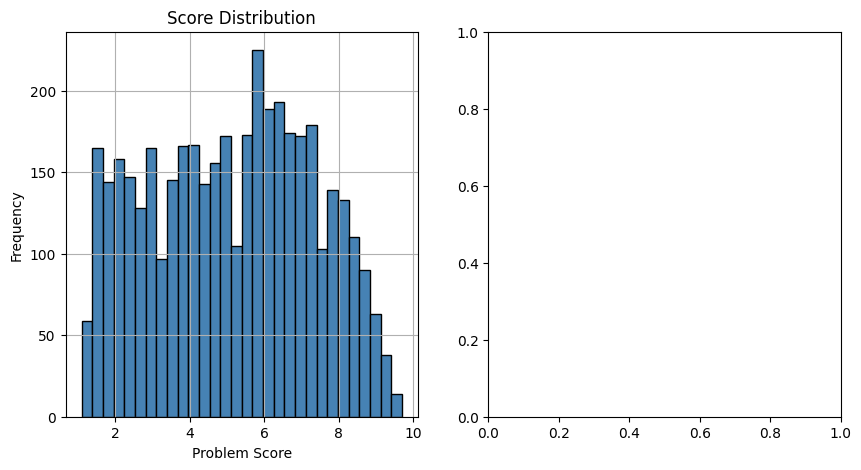

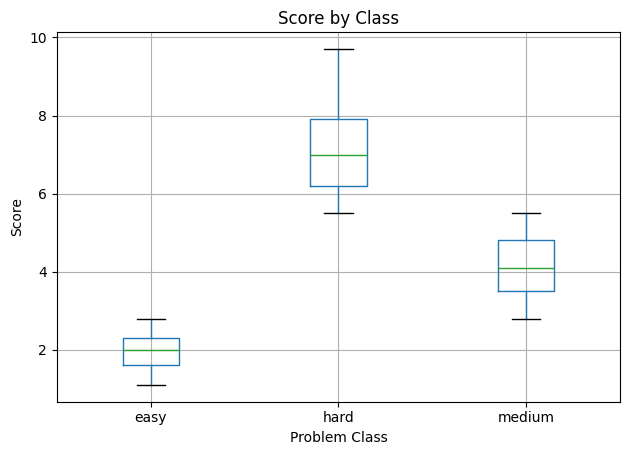

In [13]:
# Score statistics
print(" Problem Score Statistics:")
print(df['problem_score'].describe())

# Visualize score distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['problem_score'].hist(bins=30, color='steelblue', edgecolor='black')
plt.title('Score Distribution')
plt.xlabel('Problem Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df.boxplot(column='problem_score', by='problem_class')
plt.title('Score by Class')
plt.suptitle('')
plt.xlabel('Problem Class')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [15]:

# 1. Standardize & change DATATYPE of problem_class

df['problem_class'] = df['problem_class'].astype(str).str.lower().str.strip()

# Convert to category dtype (more memory efficient + proper ordering)
df['problem_class'] = df['problem_class'].astype('category')

print(" problem_class standardized and converted to category:")
print(f"   Dtype: {df['problem_class'].dtype}")
print(f"   Categories: {df['problem_class'].cat.categories.tolist()}")
print(f"   Value counts:\n{df['problem_class'].value_counts()}")


# 2. Convert sample_io (list of dicts) to text

def process_sample_io(sample_io):
    """Convert sample_io list of dicts to text string"""
    if sample_io is None or (isinstance(sample_io, list) and len(sample_io) == 0):
        return ""

    if isinstance(sample_io, list):
        text_parts = []
        for example in sample_io:
            if isinstance(example, dict):
                inp = str(example.get('input', ''))
                out = str(example.get('output', ''))
                text_parts.append(f"Input: {inp} Output: {out}")
        return " ".join(text_parts)

    return str(sample_io)  # fallback: convert to string

df['sample_io_text'] = df['sample_io'].apply(process_sample_io)
print(f"\n sample_io converted to text (new column: sample_io_text)")
print(f"   Example: {df['sample_io_text'].iloc[0][:150]}...")


# 3. Ensure all text columns are strings

text_columns = ['title', 'description', 'input_description', 'output_description']
for col in text_columns:
    df[col] = df[col].astype(str)

print(f"\n All text columns ensured as string type")


# 4. VERIFY data types after conversion
print(f"\n Updated Data Types:")
print(df[['problem_class', 'problem_score', 'sample_io_text']].dtypes)

 problem_class standardized and converted to category:
   Dtype: category
   Categories: ['easy', 'hard', 'medium']
   Value counts:
problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64

 sample_io converted to text (new column: sample_io_text)
   Example: Input: 7 10 Output: 1 2
2 3
1 3
3 4
5 6
6 7
5 7
1 7
7 2
5 1...

 All text columns ensured as string type

 Updated Data Types:
problem_class     category
problem_score      float64
sample_io_text      object
dtype: object


In [16]:

# fill missing and empty values
text_columns = ['title', 'description', 'input_description', 'output_description', 'sample_io_text']

for col in text_columns:
    # Replace NaN with empty string
    df[col] = df[col].fillna('')
    # Replace 'nan' string with empty string
    df[col] = df[col].replace('nan', '')
    # Strip whitespace
    df[col] = df[col].str.strip()

print(" Missing values handled")
print("\n Empty values count after cleaning:")
for col in text_columns:
    empty_count = (df[col] == '').sum()
    print(f"   {col}: {empty_count}")

 Missing values handled

 Empty values count after cleaning:
   title: 0
   description: 81
   input_description: 120
   output_description: 131
   sample_io_text: 30


 Score Statistics per Class:
                count  mean   std  min  25%  50%  75%  max
problem_class                                             
easy            766.0  1.97  0.43  1.1  1.6  2.0  2.3  2.8
hard           1941.0  7.07  1.05  5.5  6.2  7.0  7.9  9.7
medium         1405.0  4.13  0.77  2.8  3.5  4.1  4.8  5.5


 Score Ranges per Class:
   EASY: min=1.1, max=2.8, mean=2.0
   MEDIUM: min=2.8, max=5.5, mean=4.1
   HARD: min=5.5, max=9.7, mean=7.1


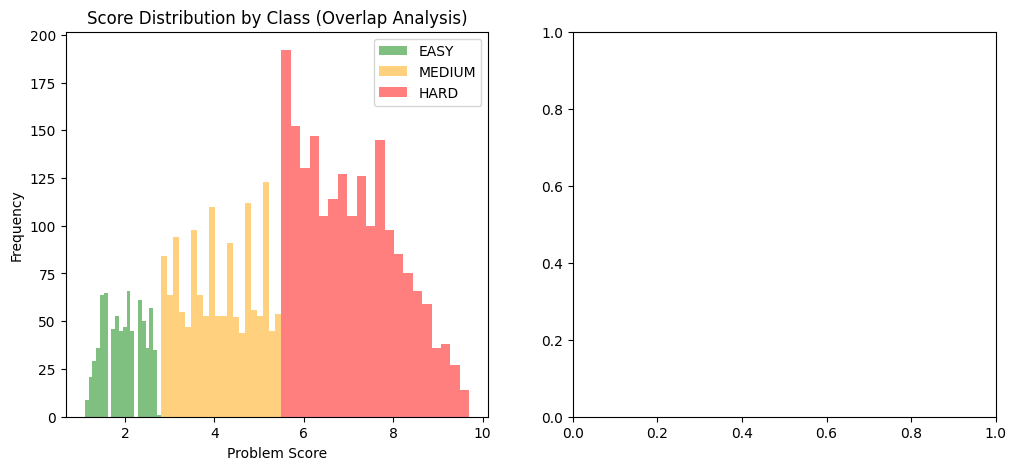

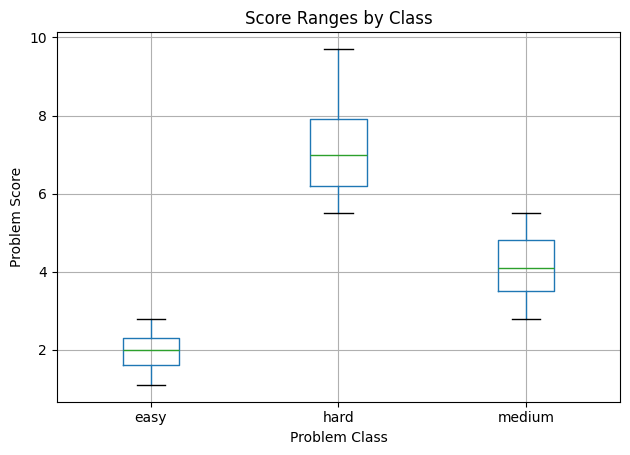


 This shows if classes and scores are aligned or have overlap!


In [17]:

# ANALYZE CLASS vs SCORE RELATIONSHIP

print(" Score Statistics per Class:")
print(df.groupby('problem_class')['problem_score'].describe().round(2))

print("\n" + "="*60)

# Check for overlapping score ranges
print("\n Score Ranges per Class:")
for cls in ['easy', 'medium', 'hard']:
    scores = df[df['problem_class'] == cls]['problem_score']
    print(f"   {cls.upper()}: min={scores.min():.1f}, max={scores.max():.1f}, mean={scores.mean():.1f}")

# Visualize overlap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cls, color in [('easy', 'green'), ('medium', 'orange'), ('hard', 'red')]:
    subset = df[df['problem_class'] == cls]['problem_score']
    plt.hist(subset, bins=20, alpha=0.5, label=cls.upper(), color=color)
plt.xlabel('Problem Score')
plt.ylabel('Frequency')
plt.title('Score Distribution by Class (Overlap Analysis)')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='problem_score', by='problem_class')
plt.title('Score Ranges by Class')
plt.suptitle('')
plt.xlabel('Problem Class')
plt.ylabel('Problem Score')

plt.tight_layout()
plt.show()

# Check correlation
print("\n This shows if classes and scores are aligned or have overlap!")

In [18]:

# Label encode problem_class

label_encoder = LabelEncoder()
df['problem_class_encoded'] = label_encoder.fit_transform(df['problem_class'])

print(" Label Encoding:")
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"   Mapping: {class_mapping}")

# Verify
print(f"\n Encoded values distribution:")
print(df['problem_class_encoded'].value_counts().sort_index())

 Label Encoding:
   Mapping: {'easy': np.int64(0), 'hard': np.int64(1), 'medium': np.int64(2)}

 Encoded values distribution:
problem_class_encoded
0     766
1    1941
2    1405
Name: count, dtype: int64


In [19]:

# text cleaning function

def clean_text(text):
    """Clean text while keeping important features"""
    if not isinstance(text, str) or text == '':
        return ''

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Normalize whitespace (keep single spaces)
    text = re.sub(r'\s+', ' ', text)

    # Strip leading/trailing whitespace
    text = text.strip()

    # NOTE: We keep math symbols like $, \leq, ^, etc. - they're useful features!

    return text

# Apply cleaning to all text columns
text_columns = ['title', 'description', 'input_description', 'output_description', 'sample_io_text']

for col in text_columns:
    df[col + '_clean'] = df[col].apply(clean_text)

print(" Text cleaning completed!")
print(f"\n New cleaned columns created:")
for col in text_columns:
    print(f"   {col}_clean")

# Show example
print(f"\n Example (original vs cleaned):")
print(f"Original: {df['description'].iloc[0][:200]}...")
print(f"Cleaned:  {df['description_clean'].iloc[0][:200]}...")

 Text cleaning completed!

 New cleaned columns created:
   title_clean
   description_clean
   input_description_clean
   output_description_clean
   sample_io_text_clean

 Example (original vs cleaned):
Original: Unununium (Uuu) was the name of the chemical
    element with atom number 111, until it changed to
    Röntgenium (Rg) in 2004. These heavy elements are very
    unstable and have only been synthesize...
Cleaned:  unununium (uuu) was the name of the chemical element with atom number 111, until it changed to röntgenium (rg) in 2004. these heavy elements are very unstable and have only been synthesized in a few l...


In [20]:

# combining all tetx fields into one

df['combined_text'] = (
    df['title_clean'] + ' ' +
    df['description_clean'] + ' ' +
    df['input_description_clean'] + ' ' +
    df['output_description_clean'] + ' ' +
    df['sample_io_text_clean']
)

# Clean the combined text (remove extra spaces)
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

print(" Combined text column created!")
print(f"\n Combined text length statistics:")
df['combined_text_length'] = df['combined_text'].str.len()
print(df['combined_text_length'].describe())

# Show example
print(f"\n Example combined text:")
print(df['combined_text'].iloc[0][:500] + "...")

 Combined text column created!

 Combined text length statistics:
count    4112.000000
mean     1650.336089
std       739.438521
min       118.000000
25%      1150.000000
50%      1543.000000
75%      2022.000000
max      6959.000000
Name: combined_text_length, dtype: float64

 Example combined text:
uuu unununium (uuu) was the name of the chemical element with atom number 111, until it changed to röntgenium (rg) in 2004. these heavy elements are very unstable and have only been synthesized in a few laboratories. you have just been hired by one of these labs to optimize the algorithms used in simulations. for example, when simulating complicated chemical reactions, it is important to keep track of how many particles there are, and this is done by counting connected components in a graph. cur...


In [21]:

# heuristic features (Domain-Specific)

def extract_heuristic_features(df):
    """Extract numerical features from text"""
    features = pd.DataFrame()

    # Length-based features
    features['text_length'] = df['combined_text'].str.len()
    features['word_count'] = df['combined_text'].str.split().str.len()
    features['sentence_count'] = df['combined_text'].str.count(r'[.!?]') + 1
    features['avg_word_length'] = features['text_length'] / (features['word_count'] + 1)

    # Description-specific lengths
    features['desc_length'] = df['description_clean'].str.len()
    features['input_desc_length'] = df['input_description_clean'].str.len()
    features['output_desc_length'] = df['output_description_clean'].str.len()

    # Math symbols count (important for difficulty)
    math_pattern = r'[\$\^\{\}\\\[\]≤≥∑∏∫]|\\leq|\\geq|\\sum|\\prod'
    features['math_symbol_count'] = df['combined_text'].str.count(math_pattern)

    # Constraint patterns (like "1 ≤ n ≤ 10^5")
    constraint_pattern = r'\d+\s*[≤<>≥]\s*\w+\s*[≤<>≥]\s*\d+'
    features['constraint_count'] = df['combined_text'].str.count(constraint_pattern)

    # Algorithmic keyword counts
    features['has_graph'] = df['combined_text'].str.contains(
        r'\b(graph|node|edge|vertex|tree|path|cycle)\b', regex=True).astype(int)
    features['has_dp'] = df['combined_text'].str.contains(
        r'\b(dynamic|optimal|maximize|minimize|subproblem)\b', regex=True).astype(int)
    features['has_recursion'] = df['combined_text'].str.contains(
        r'\b(recursive|recursion|recurrence)\b', regex=True).astype(int)
    features['has_sort'] = df['combined_text'].str.contains(
        r'\b(sort|sorted|sorting|order)\b', regex=True).astype(int)
    features['has_binary'] = df['combined_text'].str.contains(
        r'\b(binary|search|mid|bisect)\b', regex=True).astype(int)
    features['has_matrix'] = df['combined_text'].str.contains(
        r'\b(matrix|grid|2d|row|column)\b', regex=True).astype(int)

    return features

# Extract heuristic features
heuristic_features = extract_heuristic_features(df)

print(" Heuristic features extracted!")
print(f"\n Features created ({heuristic_features.shape[1]} total):")
print(heuristic_features.columns.tolist())

print(f"\n Feature statistics:")
print(heuristic_features.describe().round(2))

 Heuristic features extracted!

 Features created (15 total):
['text_length', 'word_count', 'sentence_count', 'avg_word_length', 'desc_length', 'input_desc_length', 'output_desc_length', 'math_symbol_count', 'constraint_count', 'has_graph', 'has_dp', 'has_recursion', 'has_sort', 'has_binary', 'has_matrix']

 Feature statistics:
       text_length  word_count  sentence_count  avg_word_length  desc_length  \
count      4112.00     4112.00         4112.00          4112.00      4112.00   
mean       1650.34      306.44           21.07             5.37      1060.33   
std         739.44      136.27           52.64             0.46       622.23   
min         118.00       19.00            2.00             3.35         0.00   
25%        1150.00      214.75           12.00             5.13       646.00   
50%        1543.00      287.00           15.00             5.35       966.00   
75%        2022.00      375.00           21.00             5.58      1368.25   
max        6959.00     1404.00

In [22]:

# TF-IDF vectorization

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,       # Top 5000 words
    ngram_range=(1, 2),      # Unigrams + Bigrams
    min_df=3,                # Ignore words in < 3 docs
    max_df=0.95,             # Ignore words in > 95% docs
    sublinear_tf=True        # Use log(tf) for better scaling
)

# Fit and transform on combined text
tfidf_features = tfidf_vectorizer.fit_transform(df['combined_text'])

print(" TF-IDF features extracted!")
print(f"   Shape: {tfidf_features.shape}")
print(f"   Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# Show some top features
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n Sample vocabulary (first 20):")
print(feature_names[:20])

 TF-IDF features extracted!
   Shape: (4112, 5000)
   Vocabulary size: 5000

 Sample vocabulary (first 20):
['00' '00 00' '000' '000 000' '000 007' '000 and' '000 for'
 '000 indicating' '000 is' '000 le' '000 leq' '000 output' '000 the'
 '000 where' '000 which' '0000' '0000 0000' '000000' '000000000' '001']


In [23]:
from scipy.sparse import hstack, csr_matrix


# Combine TF-IDF + heuristic features


# Convert heuristic features to sparse matrix
heuristic_sparse = csr_matrix(heuristic_features.values)

# Combine TF-IDF (sparse) + Heuristic (sparse)
X_combined = hstack([tfidf_features, heuristic_sparse])

print(" Features combined!")
print(f"   TF-IDF shape: {tfidf_features.shape}")
print(f"   Heuristic shape: {heuristic_sparse.shape}")
print(f"   Combined shape: {X_combined.shape}")

# Prepare target variables
y_class = df['problem_class_encoded'].values  # For classification
y_score = df['problem_score'].values          # For regression

print(f"\n Target variables:")
print(f"   y_class (Classification): {y_class.shape} - classes: {np.unique(y_class)}")
print(f"   y_score (Regression): {y_score.shape} - range: [{y_score.min():.1f}, {y_score.max():.1f}]")

 Features combined!
   TF-IDF shape: (4112, 5000)
   Heuristic shape: (4112, 15)
   Combined shape: (4112, 5015)

 Target variables:
   y_class (Classification): (4112,) - classes: [0 1 2]
   y_score (Regression): (4112,) - range: [1.1, 9.7]


In [24]:

# TRAIN / VALIDATION / TEST SPLIT


# First split: Train+Val (85%) vs Test (15%)
X_temp, X_test, y_class_temp, y_class_test, y_score_temp, y_score_test = train_test_split(
    X_combined, y_class, y_score,
    test_size=0.15,
    random_state=42,
    stratify=y_class  # Important for imbalanced data!
)

# Second split: Train (70%) vs Val (15%) from the temp
X_train, X_val, y_class_train, y_class_val, y_score_train, y_score_val = train_test_split(
    X_temp, y_class_temp, y_score_temp,
    test_size=0.176,  # 0.176 of 85% ≈ 15% of total
    random_state=42,
    stratify=y_class_temp
)

print(" Data split completed!")
print(f"\n Split sizes:")
print(f"   Train: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   Val:   {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"   Test:  {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

print(f"\n Class distribution in Train:")
unique, counts = np.unique(y_class_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"   Class {u}: {c} ({c/len(y_class_train)*100:.1f}%)")

 Data split completed!

 Split sizes:
   Train: 2879 samples (70.0%)
   Val:   616 samples (15.0%)
   Test:  617 samples (15.0%)

 Class distribution in Train:
   Class 0: 536 (18.6%)
   Class 1: 1359 (47.2%)
   Class 2: 984 (34.2%)


In [25]:

# apply smote to balance training data

from imblearn.over_sampling import SMOTE

# SMOTE only on training data (not val/test)
smote = SMOTE(random_state=42)
X_train_smote, y_class_train_smote = smote.fit_resample(X_train, y_class_train)

print(" SMOTE applied to training data!")
print(f"\n Before SMOTE:")
unique, counts = np.unique(y_class_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"   Class {u}: {c}")

print(f"\n After SMOTE:")
unique, counts = np.unique(y_class_train_smote, return_counts=True)
for u, c in zip(unique, counts):
    print(f"   Class {u}: {c}")

print(f"\n Training data size: {X_train.shape[0]} → {X_train_smote.shape[0]}")

 SMOTE applied to training data!

 Before SMOTE:
   Class 0: 536
   Class 1: 1359
   Class 2: 984

 After SMOTE:
   Class 0: 1359
   Class 1: 1359
   Class 2: 1359

 Training data size: 2879 → 4077


In [42]:

# RANDOM FOREST (often better for text) classification

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Handle imbalance
    random_state=42,
    n_jobs=-1
)

print(" Training Random Forest...")
rf_model.fit(X_train_smote, y_class_train_smote)
print(" Done!")

y_pred_rf = rf_model.predict(X_val)

print(f"\n Random Forest Results:")
print(f"   Accuracy: {accuracy_score(y_class_val, y_pred_rf):.4f}")
print(f"   F1-Score (Macro): {f1_score(y_class_val, y_pred_rf, average='macro'):.4f}")

print(f"\n Classification Report:")
print(classification_report(y_class_val, y_pred_rf, target_names=['Easy', 'Hard', 'Medium']))

 Training Random Forest...
 Done!

 Random Forest Results:
   Accuracy: 0.5471
   F1-Score (Macro): 0.4860

 Classification Report:
              precision    recall  f1-score   support

        Easy       0.57      0.45      0.50       115
        Hard       0.56      0.83      0.67       291
      Medium       0.46      0.20      0.28       210

    accuracy                           0.55       616
   macro avg       0.53      0.50      0.49       616
weighted avg       0.53      0.55      0.51       616



In [57]:

# REGRESSION MODEL  XGBoost

from xgboost import XGBRegressor

reg_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print(" Training Regression Model...")

# Train on original training data (NOT SMOTE - regression doesn't use SMOTE)
reg_model.fit(X_train, y_score_train)

print(" Regression model trained!")

# Predict on validation set
y_score_val_pred = reg_model.predict(X_val)

# Evaluate
mae = mean_absolute_error(y_score_val, y_score_val_pred)
rmse = np.sqrt(mean_squared_error(y_score_val, y_score_val_pred))
r2 = r2_score(y_score_val, y_score_val_pred)

print(f"\n Regression Validation Results:")
print(f"   MAE:  {mae:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   R²:   {r2:.4f}")

 Training Regression Model...
 Regression model trained!

 Regression Validation Results:
   MAE:  1.5639
   RMSE: 1.8723
   R²:   0.2479


In [58]:
# FINAL TEST SET EVALUATION

# 1. Classification with Random Forest
y_class_test_pred = rf_model.predict(X_test)
print("Random Forest Classification (Test Set):")
print(f"   Accuracy: {accuracy_score(y_class_test, y_class_test_pred):.4f}")
print(classification_report(y_class_test, y_class_test_pred, target_names=['Easy', 'Hard', 'Medium']))

# 2. Regression with XGBoost
y_score_test_pred = reg_model.predict(X_test)
mae_test = mean_absolute_error(y_score_test, y_score_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_score_test, y_score_test_pred))
r2_test = r2_score(y_score_test, y_score_test_pred)

print(f"\nXGBoost Regression (Test Set):")
print(f"   MAE:  {mae_test:.4f}")
print(f"   RMSE: {rmse_test:.4f}")
print(f"   R²:   {r2_test:.4f}")

Random Forest Classification (Test Set):
   Accuracy: 0.5219
              precision    recall  f1-score   support

        Easy       0.48      0.34      0.40       115
        Hard       0.55      0.82      0.66       291
      Medium       0.44      0.20      0.28       211

    accuracy                           0.52       617
   macro avg       0.49      0.46      0.44       617
weighted avg       0.50      0.52      0.48       617


XGBoost Regression (Test Set):
   MAE:  1.6806
   RMSE: 2.0531
   R²:   0.1244


       FINAL TEST SET EVALUATION

 CLASSIFICATION (Random Forest)
------------------------------------------------------------

Accuracy: 0.5219 (52.19%)

Classification Report:
              precision    recall  f1-score   support

        Easy       0.48      0.34      0.40       115
        Hard       0.55      0.82      0.66       291
      Medium       0.44      0.20      0.28       211

    accuracy                           0.52       617
   macro avg       0.49      0.46      0.44       617
weighted avg       0.50      0.52      0.48       617



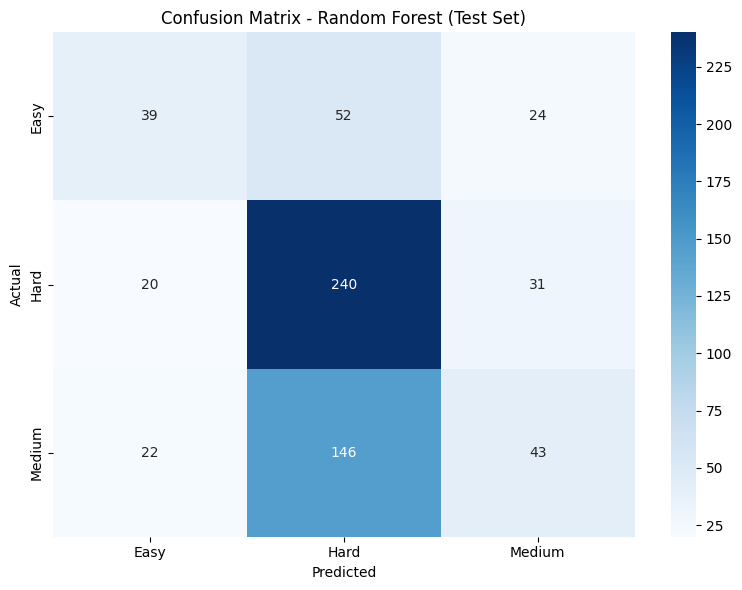


Per-Class Accuracy:
   Easy: 33.91%
   Hard: 82.47%
   Medium: 20.38%

 REGRESSION (XGBoost)
------------------------------------------------------------

MAE:  1.6806
RMSE: 2.0531
R²:   0.1244


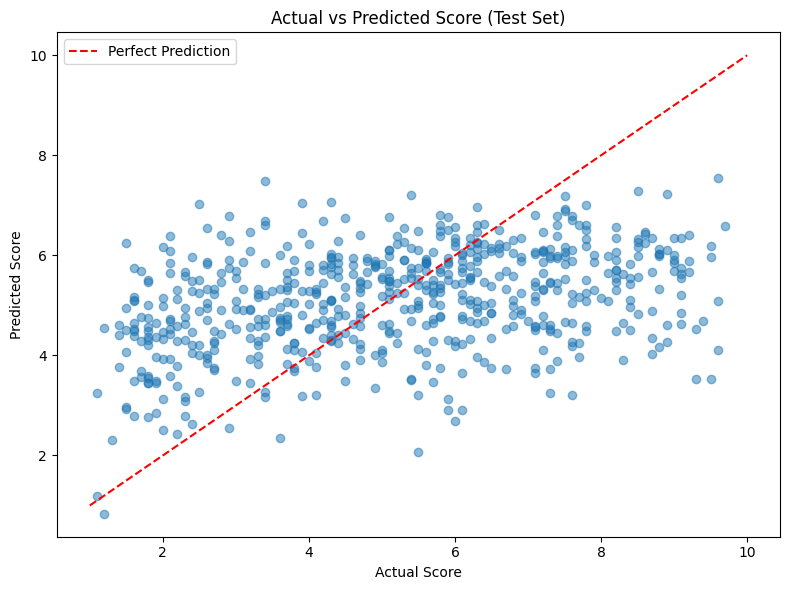


              EVALUATION COMPLETE 


In [66]:

# Complete evaluation with confusion matrix and scatter plot

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("=" * 60)
print("       FINAL TEST SET EVALUATION")
print("=" * 60)

#  CLASSIFICATION
print("\n CLASSIFICATION (Random Forest)")
print("-" * 60)

y_class_test_pred = rf_model.predict(X_test)

# Metrics
acc = accuracy_score(y_class_test, y_class_test_pred)
print(f"\nAccuracy: {acc:.4f} ({acc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_class_test, y_class_test_pred, 
                            target_names=['Easy', 'Hard', 'Medium']))

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_class_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Easy', 'Hard', 'Medium'],
            yticklabels=['Easy', 'Hard', 'Medium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.tight_layout()
plt.show()

# Per-class accuracy
print("\nPer-Class Accuracy:")
for i, class_name in enumerate(['Easy', 'Hard', 'Medium']):
    class_acc = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"   {class_name}: {class_acc:.2%}")

# REGRESSION 
print("\n" + "=" * 60)
print(" REGRESSION (XGBoost)")
print("-" * 60)

y_score_test_pred = reg_model.predict(X_test)

mae_test = mean_absolute_error(y_score_test, y_score_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_score_test, y_score_test_pred))
r2_test = r2_score(y_score_test, y_score_test_pred)

print(f"\nMAE:  {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²:   {r2_test:.4f}")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_score_test, y_score_test_pred, alpha=0.5)
plt.plot([1, 10], [1, 10], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("              EVALUATION COMPLETE ")
print("=" * 60)

In [65]:
import joblib
import os

# 1. Create 'models' directory
save_dir = '../models'
os.makedirs(save_dir, exist_ok=True)

# 2. Save Classification Model (renamed to 'classifier.pkl')
# IMPORTANT: This assumes your variable in the notebook is still named 'rf_model'
# We are just saving it with a new name on disk.
joblib.dump(rf_model, os.path.join(save_dir, 'classifier.pkl'))

# Save Preprocessing Components
joblib.dump(tfidf_vectorizer, os.path.join(save_dir, 'tfidf_vectorizer.pkl'))
joblib.dump(label_encoder, os.path.join(save_dir, 'label_encoder.pkl'))
print(f"Classification components saved to: {os.path.abspath(save_dir)}")

# 3. Save Regression Model
joblib.dump(reg_model, os.path.join(save_dir, 'reg_model.pkl'))
print("Regression model saved successfully.")

Classification components saved to: c:\Users\manas\OneDrive\Desktop\Autojudge\models
Regression model saved successfully.


In [ ]:
import pandas
import numpy
import sklearn
import xgboost
import imblearn
import matplotlib
import seaborn
import streamlit
import joblib
import scipy
p
rint(f"pandas=={pandas.__version__}")
print(f"numpy=={numpy.__version__}")
print(f"scikit-learn=={sklearn.__version__}")
print(f"xgboost=={xgboost.__version__}")
print(f"imbalanced-learn=={imblearn.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={seaborn.__version__}")
print(f"streamlit=={streamlit.__version__}")
print(f"joblib=={joblib.__version__}")
print(f"scipy=={scipy.__version__}")

pandas==2.3.3
numpy==2.3.5
scikit-learn==1.6.1
xgboost==3.1.2
imbalanced-learn==0.14.0
matplotlib==3.10.8
seaborn==0.13.2
streamlit==1.52.2
joblib==1.5.3
scipy==1.16.3
